##### TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

In [38]:
#The images are 28x28 NumPy arrays, with pixel values ranging from 0 to 255. The labels are an array of integers, 
#ranging from 0 to 9. These correspond to the class of clothing the image represents:

fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

train_images

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [10]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

10000

In [15]:
train_images.shape

(60000, 28, 28)

In [12]:
len(train_labels)

60000

In [13]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [14]:
test_images.shape


(10000, 28, 28)

In [16]:
len(test_labels)

10000

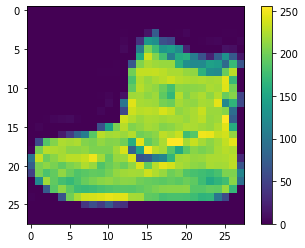

In [17]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [18]:
# processed data
train_images = train_images / 255.0

test_images = test_images / 255.0

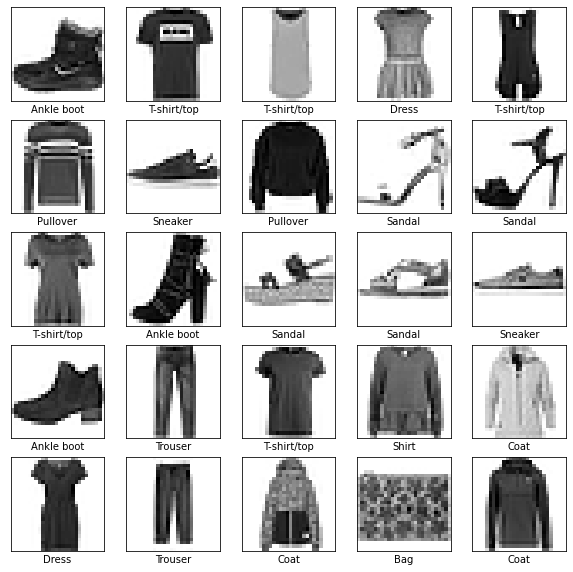

In [19]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [20]:
# Building the neural network 

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

In [21]:
#Before the model is ready for training, it needs a few more settings.
# These are added during the model's compile step:


model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [22]:
# To start training, call the model.fit method—so called because it "fits" the model to the training data:

model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5042 - accuracy: 0.8242
Epoch 2/10
1875/1875 [==============================] - 2s 932us/step - loss: 0.3810 - accuracy: 0.8632
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3402 - accuracy: 0.8773
Epoch 4/10
1875/1875 [==============================] - 2s 917us/step - loss: 0.3151 - accuracy: 0.8842
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2994 - accuracy: 0.8888
Epoch 6/10
1875/1875 [==============================] - 2s 984us/step - loss: 0.2828 - accuracy: 0.8955
Epoch 7/10
1875/1875 [==============================] - 2s 982us/step - loss: 0.2714 - accuracy: 0.8997
Epoch 8/10
1875/1875 [==============================] - 2s 906us/step - loss: 0.2587 - accuracy: 0.9033
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2508 - accuracy: 0.9080
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - l

In [23]:
# compare how the model performs on the test dataset:

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3442 - accuracy: 0.8827

Test accuracy: 0.8827000260353088


In [26]:
#With the model trained, you can use it to make predictions about some images. The model's linear outputs, logits. 
#Attach a softmax layer to convert the logits to probabilities, which are easier to interpret.

probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

predictions = probability_model.predict(test_images)

# the model has predicted the label for each image in the testing set.
# Let's take a look at the first prediction

predictions[0]

array([1.3889046e-07, 1.3806151e-09, 8.3382801e-10, 7.2137030e-10,
       1.2801724e-08, 4.7438857e-04, 6.9438535e-09, 1.8878559e-02,
       6.4452632e-07, 9.8064613e-01], dtype=float32)

In [27]:
# A prediction is an array of 10 numbers. They represent the model's "confidence" that the image corresponds to each of the 10 different articles of clothing. 
# You can see which label has the highest confidence value:

np.argmax(predictions[0])

9

In [39]:
#  Examining the test label shows that this classification is correct:

test_labels[0]

9

In [28]:
# Graph this to look at the full set of 10 class predictions.

def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

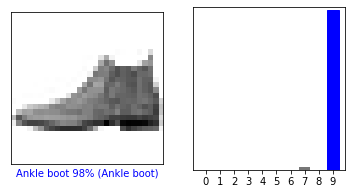

In [29]:
#verify predictions

# Let's look at the 0th image, predictions, and prediction array. Correct prediction labels are blue and incorrect prediction labels are red. 
# The number gives the percentage (out of 100) for the predicted label.

i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

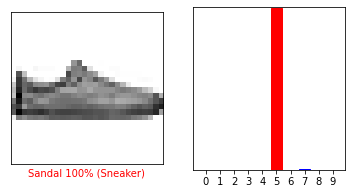

In [30]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

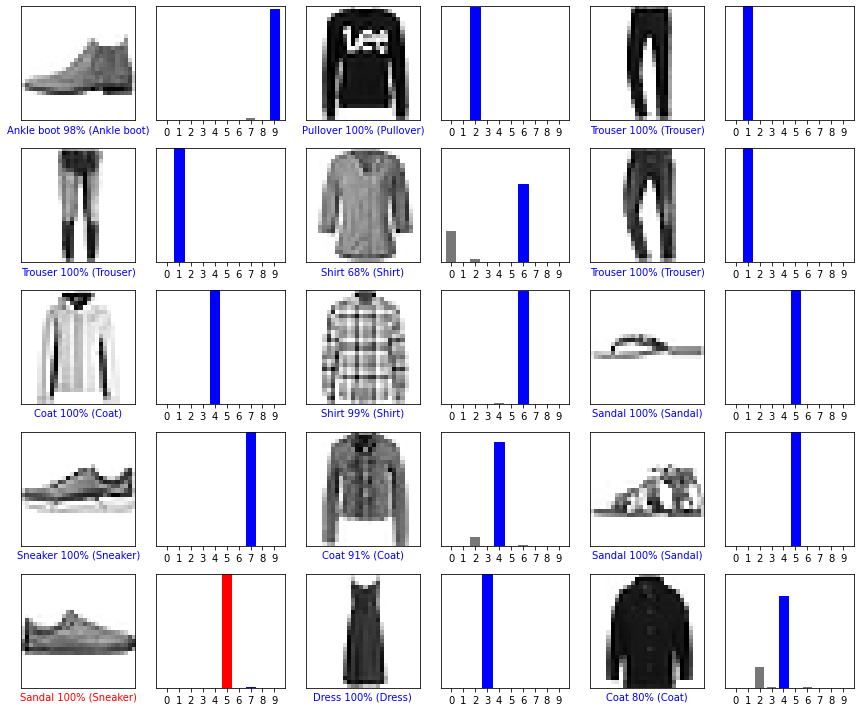

In [31]:
#Let's plot several images with their predictions.
#Note that the model can be wrong even when very confident

# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [32]:
# Finally, use the trained model to make a prediction about a single image.

# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


In [33]:
#tf.keras models are optimized to make predictions on a batch, or collection, of examples at once. Accordingly,
# even though you're using a single image, you need to add it to a list:

# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [34]:
# Now predict the correct label for this image:
predictions_single = probability_model.predict(img)

print(predictions_single)

[[7.9747770e-06 8.9941916e-14 9.9709880e-01 1.2748754e-12 2.8061555e-03
  5.0223225e-16 8.7167689e-05 7.1894390e-20 1.6885449e-13 1.6513783e-13]]


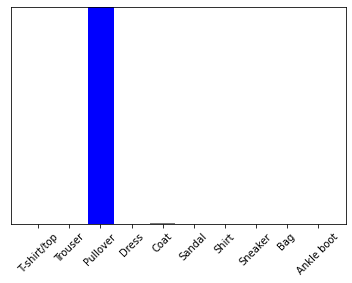

In [35]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [36]:
np.argmax(predictions_single[0])

2